# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Seorang musisi ingin mengadakan konser di beberapa negara. Musisi tersebut tertarik untuk mengetahui perkiraan pendapatan yang dapat diperolehnya jika ia menjual sejumlah tiket
## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk memperkirakan jumlah tiket yang akan terjual dan pendapatan yang dapat dihasilkan dari konser tersebut
## Rumusan Masalah
1. Menemukan model yang tepat untuk melihat prediksi pendapatan berdasarkan tiket yang dijual
2. Mencari perkiraan pendapatan dari tiket yang dijual berdasarkan data dari dataset
## Data yang akan dipakai
Data konser musisi yang telah diselenggarakan : <br>
https://www.kaggle.com/datasets/gayu14/taylor-concert-tours-impact-on-attendance-and
## Metode
Menggunakan metode supervised learning yaitu regresi

# Preparation | Persiapan
## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydantic_settings import BaseSettings
import re
%matplotlib inline


## Get Data | Mendapatkan Data

In [ ]:
df = pd.read_csv('Taylor_Train.csv')
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


## Explore Data (EDA) | Eksplorasi Data

##### Cek informasi pada data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB


Dari data di atas, semua kolom pada data frame memiliki tipe data object. Seharusnya, kolom revenue diubah tipe datanya menjadi integer. Kolom attendace dapat dibagi menjadi dua kolom yaitu kolom ticket sold dan available sehingga memudahkan dalam pengolahan data

##### Cek 5 data teratas

In [ ]:
df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


Pada 5 baris teratas Opening acts terdapa penulisan tanda '\r\n' yang digunakan sebagai pemisah baris. Pada baris ke-4 terdapat tanda '—' pada kolom Attendance dan Revenue yang seharusnya dapat diganti menjadi null terlebih dahulu. Untuk nama Tour, seharusnya tidak perlu dipidah dengan tanda '_' per katanya, bisa dipisah dengan spasi saja

##### Cek 5 data terbawah

In [ ]:
df.tail()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour
444,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


##### View qualitative measures of the data

In [ ]:
df.describe()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
count,445,445,445,444,442,442,445
unique,143,24,206,41,295,296,5
top,Los Angeles,United States,Staples Center,Gloriana\r\nKellie Pickler,—,—,Fearless_Tour
freq,16,314,16,85,35,36,111


Dari data di atas, terdapat beberapa informasi yang didapatkan :
1. Terdapat 445 konser yang telah dilaksanakan oleh penyanyi tersebut
2. Konser-konser tersebut dilaksanakan di 24 negara yang terdiri dari 143 kota dan 206 venue yang berbeda
3. Terdapat 44 opening acts berbeda
4. Los Angeles merupakan kota yang sering menjadi tempat penyanyi tersebut mengadakan konser
5. United States merupakan negara yang sering menjadi tempat penyanyi tersebut mengadakan konser
6. Staples Center merupakan venue yang sering menjadi tempat penyanyi tersebut mengadakan konser
7. Gloriana & Kellie Pickler merupakan opening acts yang sering tampil di konser
8. Fearless Tour merupakan tour yang paling banyak mengadakan pertunjukan
9. Pada kolom revenue dan attendance, terdapat tanda "—" muncul hingga 36 kali. Sehingga, dibutuhkan cleaning data sehingga tanda ini bisa hilang


##### Check missing values

In [ ]:
df.isnull().sum()

City                                     0
Country                                  0
Venue                                    0
Opening act(s)                           1
Attendance (tickets sold / available)    3
Revenue                                  3
Tour                                     0
dtype: int64

Terdapat beberapa baris yang datanya tidak ada

## Cleaning Data | Membersihkan Data

In [ ]:
df.duplicated().sum()

112

Terdapat beberapa data yang duplikat

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
440    False
441    False
442    False
443    False
444     True
Length: 445, dtype: bool

In [ ]:
df['Opening act(s)'] = df['Opening act(s)'].replace(to_replace=r'\r\n', value=' & ', regex=True)
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


In [ ]:
df['Revenue'] = df['Revenue'].str.replace('$', '').str.replace(',', '')
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,"72,805 / 72,805",7686564,Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,"43,907 / 43,907",4338127,Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,"35,749 / 35,749",3617593,Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109",14859847,Reputation_Stadium_Tour


In [ ]:
df = df.replace('—', np.nan)
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,NaN,NaN,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,"72,805 / 72,805",7686564,Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,"43,907 / 43,907",4338127,Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,"35,749 / 35,749",3617593,Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109",14859847,Reputation_Stadium_Tour


In [ ]:
df[['Tickets sold', 'Available']] = df['Attendance (tickets sold / available)'].str.split(' / ', expand=True)
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,"7,463 / 7,463",360617,Fearless_Tour,"7,463","7,463"
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,"7,822 / 7,822",340328,Fearless_Tour,"7,822","7,822"
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,"13,764 / 13,764",650420,Fearless_Tour,"13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,NaN,NaN,Fearless_Tour,NaN,NaN
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,"8,751 / 8,751",398154,Fearless_Tour,"8,751","8,751"
...,...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,"72,805 / 72,805",7686564,Reputation_Stadium_Tour,"72,805","72,805"
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,"43,907 / 43,907",4338127,Reputation_Stadium_Tour,"43,907","43,907"
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,"35,749 / 35,749",3617593,Reputation_Stadium_Tour,"35,749","35,749"
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109",14859847,Reputation_Stadium_Tour,"100,109","100,109"


In [ ]:
df.drop(columns='Attendance (tickets sold / available)', inplace=True)
df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless_Tour,"7,463","7,463"
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless_Tour,"7,822","7,822"
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless_Tour,"13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,NaN,Fearless_Tour,NaN,NaN
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless_Tour,"8,751","8,751"
...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation_Stadium_Tour,"72,805","72,805"
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation_Stadium_Tour,"43,907","43,907"
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation_Stadium_Tour,"35,749","35,749"
443,Tokyo,Japan,Tokyo Dome,Charli XCX,14859847,Reputation_Stadium_Tour,"100,109","100,109"


Kolom Attendance dipecah menjadi Tickets sold dan Available agar kita dapat mengolah data dengan mudah, kemudian diubah tipe datanya menjadi integer

In [ ]:
df[['Tickets sold', 'Available']] = df[['Tickets sold', 'Available']].replace(',', '', regex=True)
df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless_Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless_Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless_Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,NaN,Fearless_Tour,NaN,NaN
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless_Tour,8751,8751
...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation_Stadium_Tour,72805,72805
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation_Stadium_Tour,43907,43907
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation_Stadium_Tour,35749,35749
443,Tokyo,Japan,Tokyo Dome,Charli XCX,14859847,Reputation_Stadium_Tour,100109,100109


In [ ]:
df['Tour'] = df['Tour'].str.replace('_', ' ')
df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,NaN,Fearless Tour,NaN,NaN
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless Tour,8751,8751
...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation Stadium Tour,72805,72805
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation Stadium Tour,43907,43907
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation Stadium Tour,35749,35749
443,Tokyo,Japan,Tokyo Dome,Charli XCX,14859847,Reputation Stadium Tour,100109,100109


In [ ]:
df[['Revenue', 'Tickets sold', 'Available']] = df[['Revenue', 'Tickets sold', 'Available']].apply(pd.to_numeric, errors='coerce')
df[['Revenue', 'Tickets sold', 'Available']] = df[['Revenue', 'Tickets sold', 'Available']].fillna(0)
df[['Revenue', 'Tickets sold', 'Available']] = df[['Revenue', 'Tickets sold', 'Available']].astype(int)
df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,0,Fearless Tour,0,0
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless Tour,8751,8751
...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation Stadium Tour,72805,72805
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation Stadium Tour,43907,43907
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation Stadium Tour,35749,35749
443,Tokyo,Japan,Tokyo Dome,Charli XCX,14859847,Reputation Stadium Tour,100109,100109


In [ ]:
df[['Revenue', 'Tickets sold', 'Available']] = df[['Revenue', 'Tickets sold', 'Available']].apply(pd.to_numeric, errors='coerce')
df[['Revenue', 'Tickets sold', 'Available']] = df[['Revenue', 'Tickets sold', 'Available']].replace(0, np.nan)
df[['Revenue', 'Tickets sold', 'Available']] = df.groupby('Tour')[['Revenue', 'Tickets sold', 'Available']].transform(lambda x: x.fillna(x.mean()))

df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,3.606170e+05,Fearless Tour,7463.000000,7463.000000
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,3.403280e+05,Fearless Tour,7822.000000,7822.000000
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,6.504200e+05,Fearless Tour,13764.000000,13764.000000
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,1.037903e+06,Fearless Tour,17668.858974,17804.628205
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,3.981540e+05,Fearless Tour,8751.000000,8751.000000
...,...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7.686564e+06,Reputation Stadium Tour,72805.000000,72805.000000
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4.338127e+06,Reputation Stadium Tour,43907.000000,43907.000000
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3.617593e+06,Reputation Stadium Tour,35749.000000,35749.000000
443,Tokyo,Japan,Tokyo Dome,Charli XCX,1.485985e+07,Reputation Stadium Tour,100109.000000,100109.000000


Pada cell di atas dilakukan proses feature engineering untuk mengisi baris yang tidak memiliki nilai pada revenue, tiskets sold, dan available dengan cara merata2 kan nilai pada setiap kolom tersebut dan digroup berdasarkan nama tournya.

In [ ]:
df[['Revenue', 'Tickets sold', 'Available']] =df[['Revenue', 'Tickets sold', 'Available']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   City            445 non-null    object
 1   Country         445 non-null    object
 2   Venue           445 non-null    object
 3   Opening act(s)  414 non-null    object
 4   Revenue         445 non-null    int32 
 5   Tour            445 non-null    object
 6   Tickets sold    445 non-null    int32 
 7   Available       445 non-null    int32 
dtypes: int32(3), object(5)
memory usage: 22.7+ KB


Kolom Revenue, Tickets sold, dan Available diubah tipe datanya menjadi integer

In [ ]:
df = df.drop_duplicates()
df

,City,Country,Venue,Opening act(s),Revenue,Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,1037902,Fearless Tour,17668,17804
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless Tour,8751,8751
...,...,...,...,...,...,...,...,...
439,Melbourne,Australia,Marvel Stadium,Charli XCX & Broods,6755570,Reputation Stadium Tour,63027,63027
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation Stadium Tour,72805,72805
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation Stadium Tour,43907,43907
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation Stadium Tour,35749,35749


In [ ]:
df = df.rename(columns={"Revenue": "Revenue ($)"})
df

,City,Country,Venue,Opening act(s),Revenue ($),Tour,Tickets sold,Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana & Kellie Pickler,360617,Fearless Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana & Kellie Pickler,340328,Fearless Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana & Kellie Pickler,650420,Fearless Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana & Kellie Pickler,1037902,Fearless Tour,17668,17804
4,North Charleston,United States,North Charleston Coliseum,Gloriana & Kellie Pickler,398154,Fearless Tour,8751,8751
...,...,...,...,...,...,...,...,...
439,Melbourne,Australia,Marvel Stadium,Charli XCX & Broods,6755570,Reputation Stadium Tour,63027,63027
440,Sydney,Australia,ANZ Stadium,Charli XCX & Broods,7686564,Reputation Stadium Tour,72805,72805
441,Brisbane,Australia,The Gabba,Charli XCX & Broods,4338127,Reputation Stadium Tour,43907,43907
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX & Broods,3617593,Reputation Stadium Tour,35749,35749


In [ ]:
df.drop(columns=['Opening act(s)', 'Venue'], inplace=True)
df

,City,Country,Revenue ($),Tour,Tickets sold,Available
0,Evansville,United States,360617,Fearless Tour,7463,7463
1,Jonesboro,United States,340328,Fearless Tour,7822,7822
2,St. Louis,United States,650420,Fearless Tour,13764,13764
3,Alexandria,United States,1037902,Fearless Tour,17668,17804
4,North Charleston,United States,398154,Fearless Tour,8751,8751
...,...,...,...,...,...,...
439,Melbourne,Australia,6755570,Reputation Stadium Tour,63027,63027
440,Sydney,Australia,7686564,Reputation Stadium Tour,72805,72805
441,Brisbane,Australia,4338127,Reputation Stadium Tour,43907,43907
442,Auckland,New Zealand,3617593,Reputation Stadium Tour,35749,35749


## Explore Data (EDA) 2 | Eksplorasi Data 2

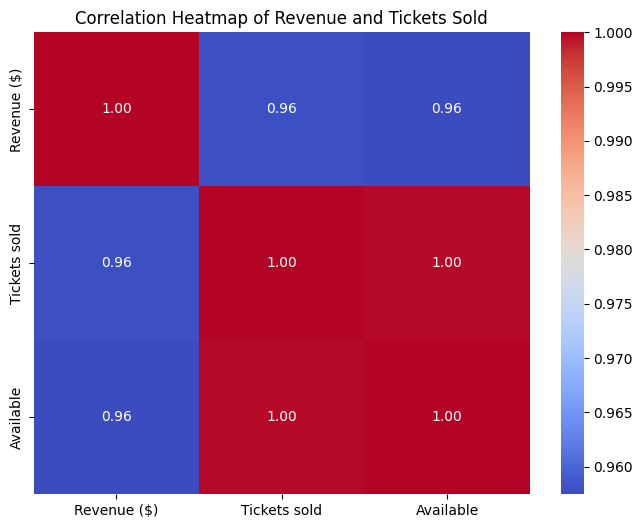

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Revenue ($)', 'Tickets sold', 'Available']
data_features = df[features]

# Mencari korelasi antara 3 kolom yang berada pada data_features
correlation_matrix = data_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Revenue and Tickets Sold')
plt.show()


Tickets sold dan Available sangat berkorelasi, memiliki arti bahwa semua tiket hampir semuanya terjual. Available dan tickets sold juga memiliki korelasi yang tinggi dengan

In [ ]:
sold_percentage = round((df['Tickets sold'].sum() / df['Available'].sum()) * 100, 2)
sold_percentage

99.77

Jumlah tiket yang terjual mencapai 99,77%

In [ ]:
#Mencari revenue dan ticket sold tertinggi
max_revenue_index = df['Revenue ($)'].idxmax()
max_tickets_sold_index = df['Tickets sold'].idxmax()

highest_revenue_entry = df.loc[max_revenue_index]
highest_tickets_sold_entry = df.loc[max_tickets_sold_index]

print("Show with highest revenue:")
print(highest_revenue_entry)
print("\nShow with highest tickets sold:")
print(highest_tickets_sold_entry)

Show with highest revenue:
City                    East Rutherford
Country                   United States
Revenue ($)                    22031386
Tour            Reputation Stadium Tour
Tickets sold                     165654
Available                        165654
Name: 414, dtype: object

Show with highest tickets sold:
City                         Foxborough
Country                   United States
Revenue ($)                    21779846
Tour            Reputation Stadium Tour
Tickets sold                     174764
Available                        174764
Name: 417, dtype: object


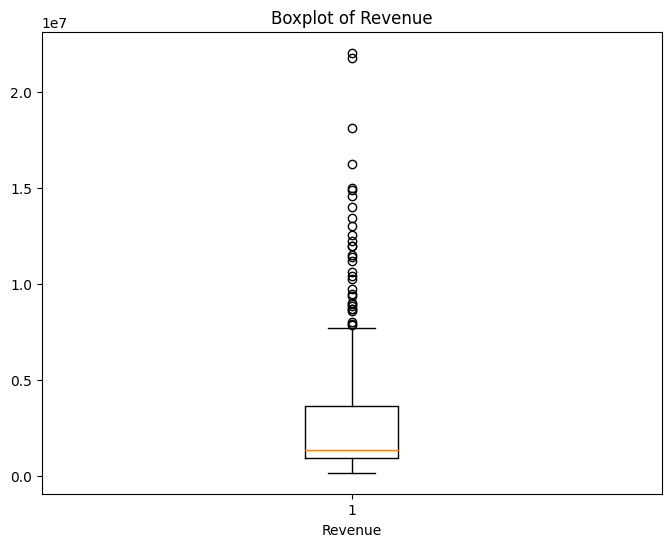

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Revenue ($)'])
plt.xlabel('Revenue')
plt.title('Boxplot of Revenue')
plt.show()

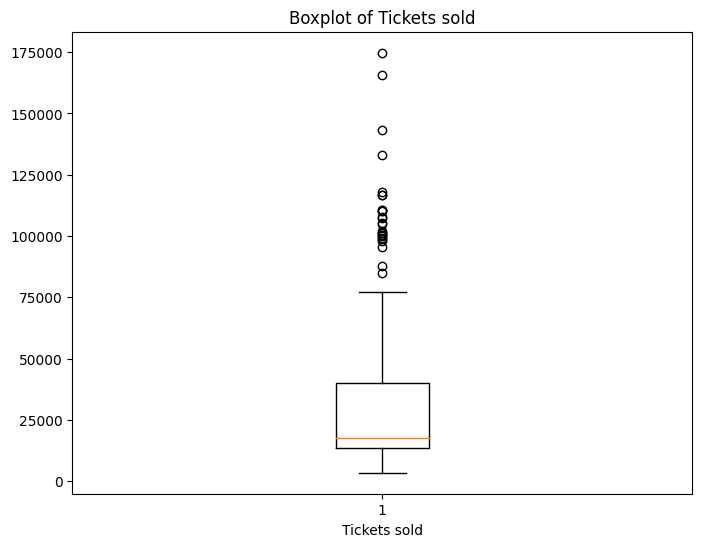

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tickets sold'])
plt.xlabel('Tickets sold')
plt.title('Boxplot of Tickets sold')
plt.show()

Data pada dataset terdapat banyak outliers, hal ini sebenarnya wajar dalam data konser seperti ini karena setiap show memiliki jumlah pengunjung yang berbeda-beda tergantung kapasitas venuenya.

In [ ]:
countries = df.groupby("Country").count()
countries

,City,Revenue ($),Tour,Tickets sold,Available
Country,,,,,
Australia,22,22,22,22,22
Belgium,1,1,1,1,1
Canada,21,21,21,21,21
China,2,2,2,2,2
England,14,14,14,14,14
France,1,1,1,1,1
Germany,3,3,3,3,3
Hong Kong,1,1,1,1,1
Indonesia,1,1,1,1,1


In [ ]:
countries.count()

City            24
Revenue ($)     24
Tour            24
Tickets sold    24
Available       24
dtype: int64

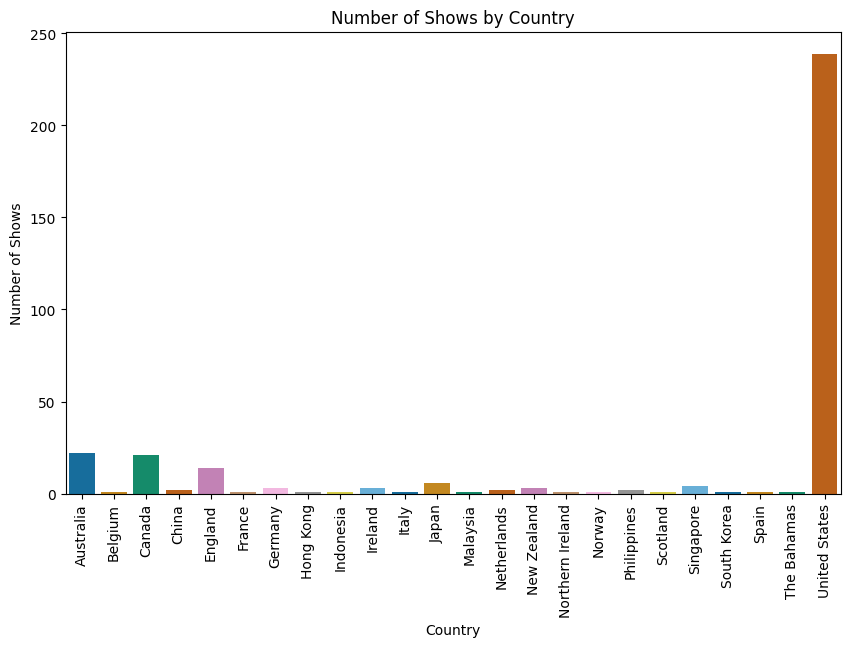

In [ ]:
import matplotlib.pyplot as plt

countries = df.groupby("Country").size().reset_index(name='count')
colors = sns.color_palette("colorblind")

plt.figure(figsize=(10, 6))
sns.barplot(data=countries, x='Country', y='count', palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Number of Shows by Country')
plt.show()


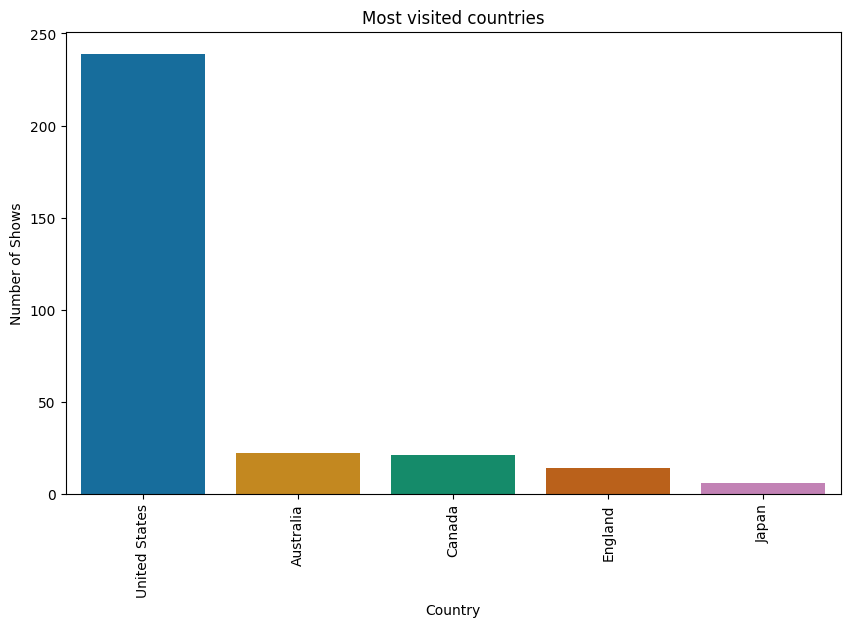

In [ ]:
# Ambil 5 negara yang paling banyak show
countries = df.groupby("Country").size().sort_values(ascending=False).reset_index(name='count').head()

plt.figure(figsize=(10, 6))
sns.barplot(data=countries, x='Country', y='count', palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Most visited countries')
plt.show()


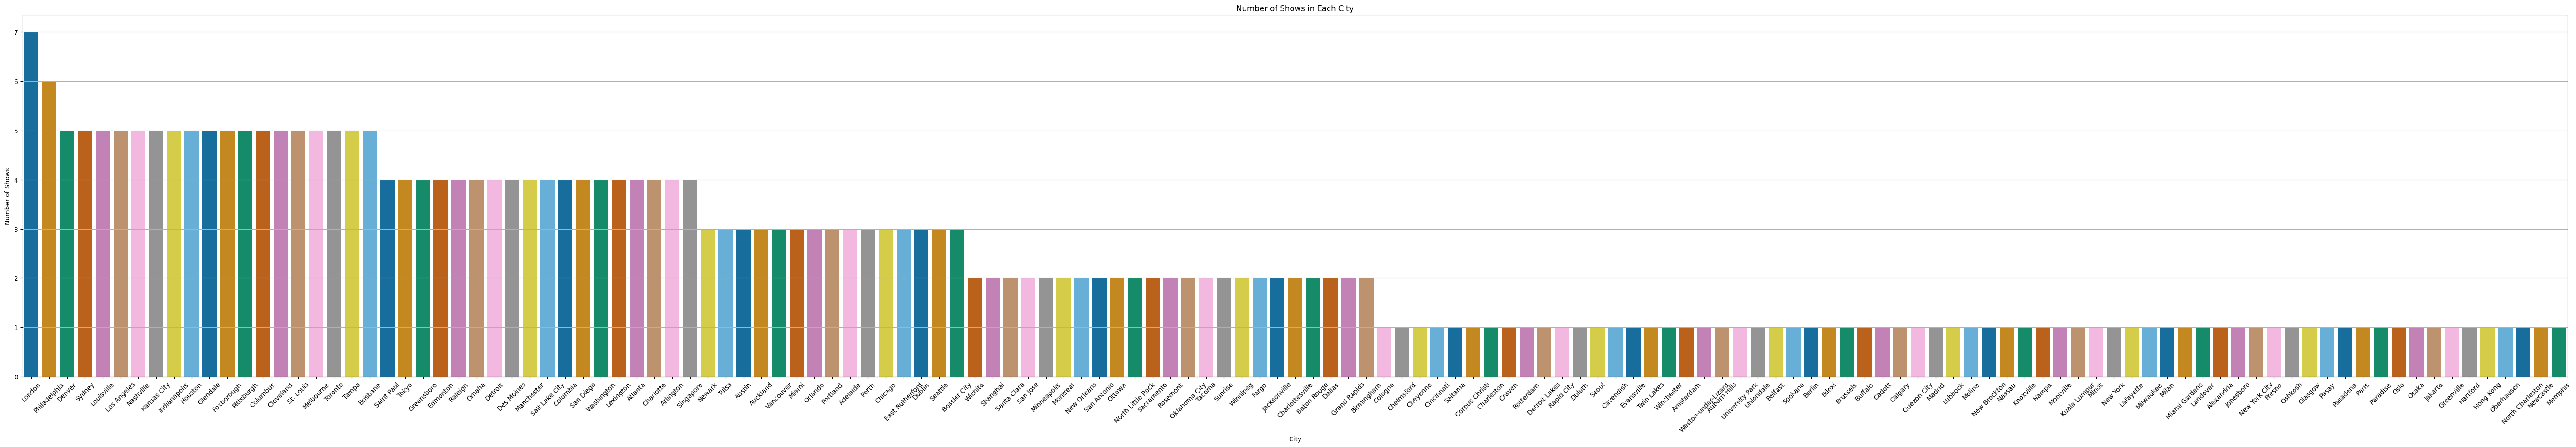

In [ ]:
# Urut data kota
cities = df.groupby("City").size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(70, 10))
sns.barplot(data=cities, x='City', y='count', palette=colors)
plt.xlabel('City')
plt.ylabel('Number of Shows')
plt.title('Number of Shows in Each City')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


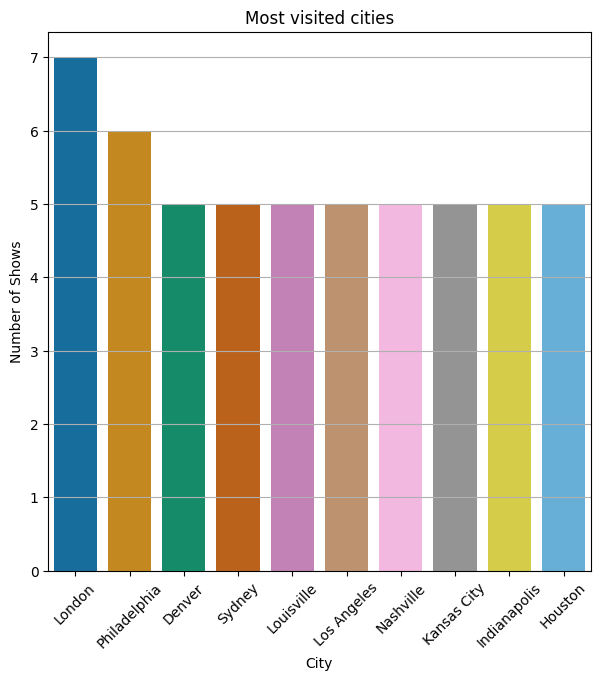

In [ ]:
# Ambil 10 besar kota dengan show terbanyak
cities = df.groupby("City").size().sort_values(ascending=False).reset_index(name='count').head(10)

plt.figure(figsize=(7, 7))
sns.barplot(data=cities, x='City', y='count', palette=colors)
plt.xlabel('City')
plt.ylabel('Number of Shows')
plt.title('Most visited cities')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Cek persebaran lokasi konser menggunakan folium

In [ ]:
# Buat kolom baru untuk diisi dengan kota dan negara
df['City_Country'] = df['City'] + ', ' + df['Country']
cities_list = df['City_Country'].unique().tolist()

print(cities_list)

['Evansville, United States', 'Jonesboro, United States', 'St. Louis, United States', 'Alexandria, United States', 'North Charleston, United States', 'Jacksonville, United States', 'Biloxi, United States', 'London, England', 'Spokane, United States', 'Seattle, United States', 'Portland, United States', 'Nampa, United States', 'Glendale, United States', 'Los Angeles, United States', 'Paradise, United States', 'San Diego, United States', 'Salt Lake City, United States', 'New Brockton, United States', 'Columbia, United States', 'Greensboro, United States', 'Oshkosh, United States', 'Cadott, United States', 'Calgary, Canada', 'Edmonton, Canada', 'Craven, Canada', 'Winnipeg, Canada', 'Twin Lakes, United States', 'Columbus, United States', 'Charleston, United States', 'Cheyenne, United States', 'Rapid City, United States', 'Minot, United States', 'Philadelphia, United States', 'Detroit Lakes, United States', 'Omaha, United States', 'Chelmsford, England', 'Weston-under-Lizard, England', 'New 

In [ ]:
from geopy.geocoders import Nominatim
import time

# Set PIP timeout
import os
os.environ['PIP_DEFAULT_TIMEOUT'] = '100'

# Inisialisasi geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Membuat list kosong yang nantinya akan diisi koordinat
coordinates = []

# Mencari koordinat dari setiap kota menggunakan geocoder
for city in cities_list:
    result = geolocator.geocode(city)
    time.sleep(1)
    if result:
        coordinates.append((city, result.latitude, result.longitude))
    else:
        coordinates.append((city, None, None))

print(coordinates)


[('Evansville, United States', 37.970495, -87.5715641), ('Jonesboro, United States', 35.8272257, -90.6949871), ('St. Louis, United States', 38.6280278, -90.1910154), ('Alexandria, United States', 38.8051095, -77.0470229), ('North Charleston, United States', 32.8546197, -79.9748103), ('Jacksonville, United States', 30.3321838, -81.655651), ('Biloxi, United States', 30.4007626, -88.8893818), ('London, England', 51.4893335, -0.14405508452768728), ('Spokane, United States', 47.6571934, -117.42351), ('Seattle, United States', 47.6038321, -122.330062), ('Portland, United States', 45.5202471, -122.674194), ('Nampa, United States', 43.5737361, -116.559631), ('Glendale, United States', 34.1469416, -118.2478471), ('Los Angeles, United States', 34.0536909, -118.242766), ('Paradise, United States', 36.1011223, -115.1479329), ('San Diego, United States', 32.7174202, -117.162772), ('Salt Lake City, United States', 40.7596198, -111.886797), ('New Brockton, United States', 31.3857239, -85.9293861), ('

In [ ]:
import folium

# Buat Map
m = folium.Map(location=[20, 0], zoom_start=2)

# Buat koordinat setiap kota
for city, lat, lon in coordinates:
    folium.Marker(location=[lat, lon], popup=city).add_to(m)

# Display Map
display(m)

# Model Training | Pelatihan Model

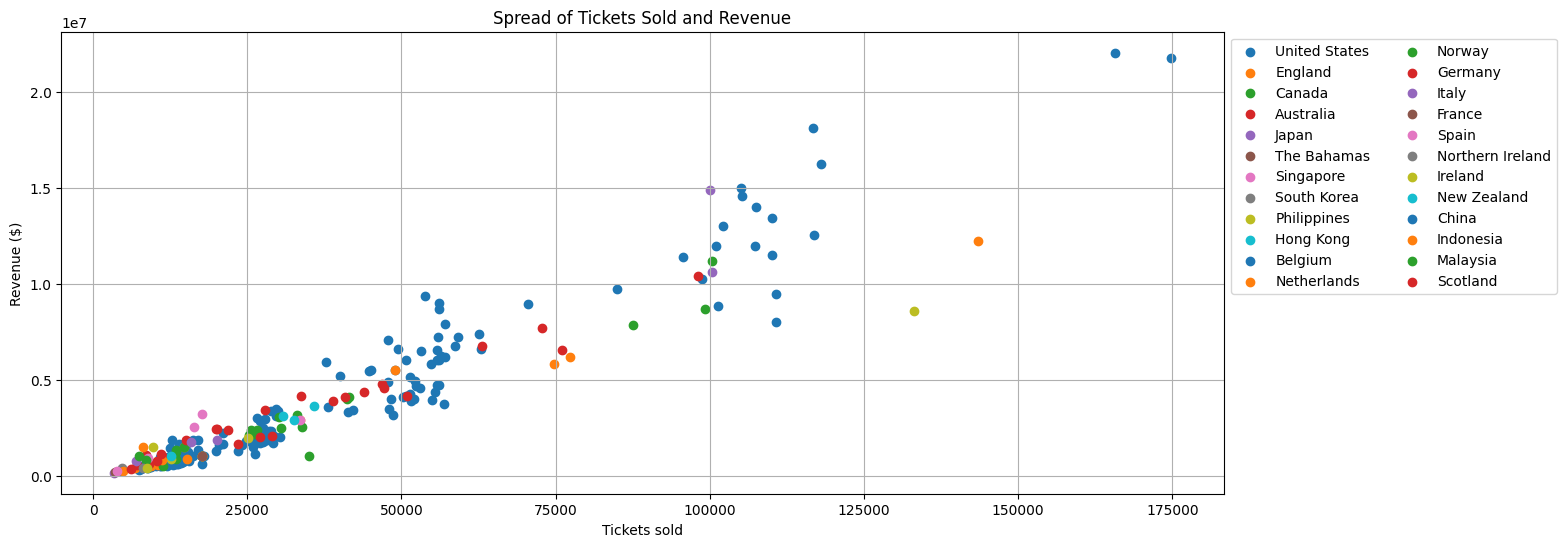

In [ ]:
import matplotlib.pyplot as plt

countries = df['Country'].unique()

plt.figure(figsize=(15, 6))
for country in countries:
    country_data = df[df['Country'] == country]
    plt.scatter(country_data['Tickets sold'], country_data['Revenue ($)'], label=country)

plt.xlabel('Tickets sold')
plt.ylabel('Revenue ($)')
plt.title('Spread of Tickets Sold and Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.grid(True)

plt.show()


## Metriks yang dipakai dan alasan pemakaian :
Karena kita akan mencari nilai pendapatan yang dihasilkan berdasarkan jumlah tiket yang terjual, maka cara yang tepat adalah dengan memodelkan hubungan antara x dan y dengan regresi. Terlihat dari grafik di atas, bahwa variabel dependen cenderung mengikuti perubahan dari nilai variabel independen  

In [ ]:
from sklearn.model_selection import train_test_split

# Masukkan data pada kolum ke variabel x dan y
x = df['Tickets sold'].values.reshape(-1, 1)
y = df['Revenue ($)'].values.reshape(-1, 1)

## Linear Regression

Linear Regression dipilih karena merupakan algoritma yang sederahana dan dapat melihat hubungan antara dua variabel dengan lebih mudah

In [ ]:
from sklearn.linear_model import LinearRegression

#Pre-processing
x_train_linreg, x_test_linreg, y_train_linreg, y_test_linreg = train_test_split(x, y, test_size = 0.2)

# Membuat model
linreg = LinearRegression()
linreg.fit(x_train_linreg,y_train_linreg)

LinearRegression()

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

[-727567.55516908]
[[120.06472223]]


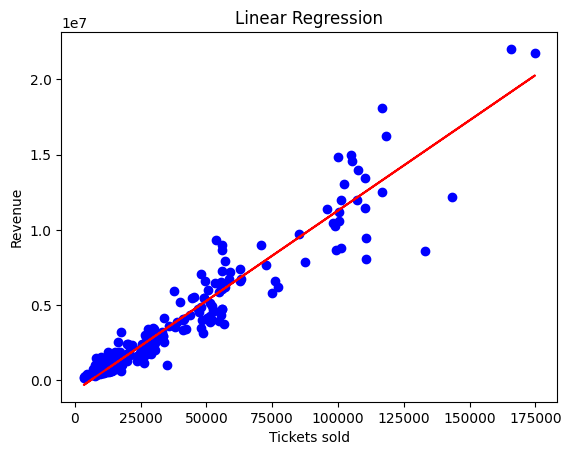

In [ ]:
# Membuat visualisasi model
plt.scatter(x, y, color = 'blue')
plt.plot(x_train_linreg, linreg.predict(x_train_linreg), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Tickets sold')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Membuat prediksi
y_pred_linreg = linreg.predict(x_test_linreg)
formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_linreg.reshape(-1)]

# Visualisasi data asli dan data prediksi dengan data frame
df_pred = pd.DataFrame({'Actual Data': y_test_linreg.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred


,Actual Data,Predicted Data
0,6230876,6049485.6908578556
1,1988411,2472397.4215890025
2,4096060,4186681.5255268626
3,2416030,1658118.4754546299
4,4268678,5443158.8436183119
...,...,...
62,650420,925003.2815447981
63,724854,594585.1659798033
64,1037902,1393735.9571137438
65,2048023,2330600.9846405070


## Ridge Regression

Ridge Regression digunakan untuk mengatasi korelasi yang tinggi antara beberapa variabel bebas

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
# Pre-processing
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(x, y, test_size = 0.2)

# Membuat model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train_ridge,y_train_ridge)

Ridge(alpha=10)

In [ ]:
# Membuat prediksi
y_pred_ridge = ridgeReg.predict(x_test_ridge)
formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_ridge.reshape(-1)]

df_pred = pd.DataFrame({'Actual Data': y_test_ridge.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred

,Actual Data,Predicted Data
0,1024223,1407031.1078761260
1,1082042,903542.5358864232
2,1499040,1040732.5701845507
3,777442,889789.1489893678
4,1109253,912367.6258120337
...,...,...
62,398154,350885.6057397475
63,645592,632486.2024569565
64,1037902,1372876.8637484384
65,647923,843829.9144417078


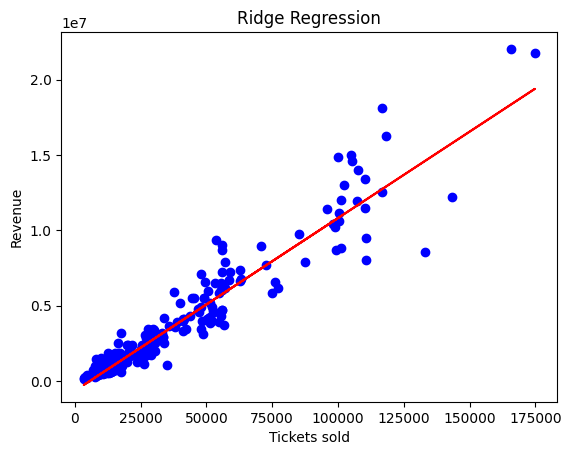

In [ ]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, ridgeReg.predict(x), color = 'red')
plt.title('Ridge Regression')
plt.xlabel('Tickets sold')
plt.ylabel('Revenue')
plt.show()

## Lasso Regression

Lasso regression digunakan untuk mengatasi masalah multikolinearitas dengan menyusutkan koefisien taksirannya mendekati nol, bahkan dapat hingga tepat nol

In [ ]:
# Pre-processing
x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(x, y, test_size = 0.2)

# Membuat model
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(x_train_lasso,y_train_lasso)

Lasso(alpha=0.1)

In [ ]:
# Membuat prediksi
y_pred_lasso = lassoReg.predict(x_test_lasso)
formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_lasso.reshape(-1)]

df_pred = pd.DataFrame({'Actual Data': y_test_lasso.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred

,Actual Data,Predicted Data
0,1037902,1396840.9099919840
1,1037902,1396840.9099919840
2,3148046,4990448.2658979539
3,1037902,1396840.9099919840
4,820036,807793.5982062705
...,...,...
62,877175,892126.0036258288
63,2219188,1792214.4907107125
64,868955,615283.0727312793
65,934326,787786.4620239753


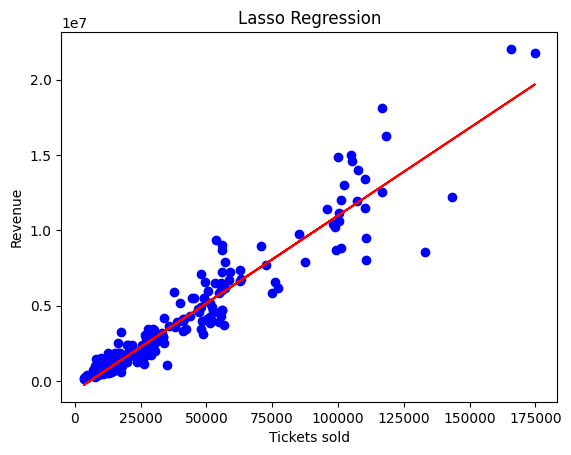

In [ ]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, lassoReg.predict(x), color = 'red')
plt.title('Lasso Regression')
plt.xlabel('Tickets sold')
plt.ylabel('Revenue')
plt.show()

## Random Forest Regression

Random Forest merupakan metode ensemble yang menggunakan banyak pohon keputusan. Masing-masing pohon dalam Random Forest beroperasi secara independen, dan hasil akhirnya adalah agregat dari prediksi semua pohon.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pre-processing
x_train_rfr, x_test_rfr, y_train_rfr, y_test_rfr = train_test_split(x, y, test_size = 0.2)

# Membuat model
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train_rfr, y_train_rfr.ravel())

RandomForestRegressor()

In [ ]:
# Membuat prediksi
y_pred_rfr = rfr.predict(x_test_rfr)

# Format hasil prediksi, mengambil desimal 10 angka di belakang koma
formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_rfr.reshape(-1)]

#Melihat data frame
df_pred = pd.DataFrame({'Actual Data': y_test_rfr.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred

,Actual Data,Predicted Data
0,22031386,17577289.6999999993
1,934326,872150.2700000000
2,3617593,3406596.4600000000
3,2219188,1903113.6699999999
4,6730138,7085732.5800000001
...,...,...
62,1119300,683953.5800000000
63,8672219,5464809.9100000001
64,1037902,1037902.0000000000
65,14576697,13762910.6799999997


## Gradient Boosting Regression

Metode ensemble yang membangun model prediksi secara bertahap dengan mengkombinasikan beberapa model prediksi yang relatif sederhana

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Pre-processing
x_train_gbr, x_test_gbr, y_train_gbr, y_test_gbr = train_test_split(x, y, test_size = 0.2)

# Membuat model
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(x_train_gbr, y_train_gbr.ravel())

GradientBoostingRegressor()

In [ ]:
# Membuat prediksi
y_pred_gbr = gbr.predict(x_test_gbr)

# Format hasil prediksi, mengambil desimal 10 angka di belakang koma
formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_gbr.reshape(-1)]

#Membuat data frame
df_pred = pd.DataFrame({'Actual Data': y_test_gbr.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred

,Actual Data,Predicted Data
0,1037902,1110682.8726044744
1,1037902,1110682.8726044744
2,743492,1254883.2661214208
3,413622,648189.6083141954
4,5148757,4451375.4973980645
...,...,...
62,9464063,8498129.0115478151
63,1132095,1185568.3309025269
64,598581,795220.4061007135
65,1037902,1110682.8726044744


## Support Vector Regression

SVR merupakan model yang cenderung kompleks karena bergantung pada konsep ruang fitur yang diperluas (kernel trick) untuk memetakan data ke dimensi yang lebih tinggi. SVR mampu menangani hubungan yang kompleks antara variabel input dan output

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(x, y, test_size = 0.2)

svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(x_train_svr, y_train_svr.ravel())

SVR(C=100, gamma=0.1)

In [ ]:
y_pred_svr = gbr.predict(x_test_svr)

formatted_y_pred = ["{:.10f}".format(pred) for pred in y_pred_svr.reshape(-1)]

df_pred = pd.DataFrame({'Actual Data': y_test_svr.reshape(-1), 'Predicted Data': formatted_y_pred})
df_pred

,Actual Data,Predicted Data
0,1481473,890587.1409860556
1,2489205,2367253.5576027590
2,4734463,5807981.6581854001
3,1037902,2529105.9926592498
4,1037902,1110682.8726044744
...,...,...
62,610801,760598.5221044315
63,4149148,4505178.4372313973
64,1850159,2302897.7076027589
65,4337062,5246921.6148378830


# Model Evaluation | Evaluasi Model

Melakukan evaluasi model menggunakan beberapa metriks yaitu Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²). Penggunaan metriks evaluasi ini dikarenakan metriks-metriks tersebut cocok untuk melihat keacocok

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae_linreg = mean_absolute_error(y_test_linreg, y_pred_linreg)
mse_linreg = mean_squared_error(y_test_linreg, y_pred_linreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = r2_score(y_test_linreg, y_pred_linreg)

print(mae_linreg, mse_linreg, rmse_linreg, r2_linreg)

481743.55391524546 970331456907.848 985054.0375572541 0.8733620498903051


In [ ]:
mae_ridge = mean_absolute_error(y_test_ridge, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_ridge, y_pred_ridge)

print(mae_ridge, mse_ridge, rmse_ridge, r2_ridge)

590919.6946508593 977819584318.6705 988847.6041932197 0.9111411737332615


In [ ]:
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print(mae_lasso, mse_lasso, rmse_lasso, r2_lasso)

426191.73552682466 492443659955.9685 701743.3006135281 0.939765368877845


In [ ]:
mae_rfr = mean_absolute_error(y_test_rfr, y_pred_rfr)
mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test_rfr, y_pred_rfr)

print(mae_rfr, mse_rfr, rmse_rfr, r2_rfr)

665938.9537313433 1308010415687.9526 1143682.8300223593 0.9225244677863235


In [ ]:
mae_gbr = mean_absolute_error(y_test_gbr, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_gbr, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test_gbr, y_pred_gbr)

print(mae_gbr, mse_gbr, rmse_gbr, r2_gbr)

401884.0458851707 459220419158.0632 677658.0399862921 0.9341670789671336


In [ ]:
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)

print(mae_svr, mse_svr, rmse_svr, r2_svr)

373183.5797378974 346919900593.7329 588999.0667172002 0.9791151354609069


## Model Selection | Pemilihan Model

Setiap model memiliki keuntungan dan kerugiannya masi-masing, antara lain :
1. Linear Regression: <br>
Keuntungan: Sederhana, mudah diinterpretasikan, cepat dalam pelatihan dan prediksi.<br>
Kerugian: Rentan terhadap overfitting jika tidak ada regularisasi.

2. Lasso Regression:<br>
Keuntungan: Menerapkan regularisasi L1, sehingga dapat menghasilkan model yang lebih parsial (sparse), berguna untuk fitur seleksi.<br>
Kerugian: Lebih kompleks daripada Linear Regression, memerlukan penyetelan parameter alpha.<br>

3. Ridge Regression:<br>
Keuntungan: Menerapkan regularisasi L2, mengurangi overfitting dengan menambahkan bias.<br>
Kerugian: Memerlukan penyetelan parameter alpha, sama seperti Lasso<br>

4. Gradient Boosting:<br>
Keuntungan: Mampu menangani hubungan yang kompleks, baik dalam hal prediksi maupun fitur seleksi.<br>
Kerugian: Lebih kompleks dan membutuhkan waktu lebih lama dalam pelatihan dibandingkan dengan model regresi linier.<br>

5. SVR (Support Vector Regression):<br>
Keuntungan: Mampu menangani hubungan yang non-linear dengan menggunakan kernel yang sesuai, dapat menghasilkan prediksi yang akurat.<br>
Kerugian: Kompleks dalam hal konfigurasi parameter kernel, memerlukan waktu pelatihan yang lebih lama terutama untuk dataset besar.<br>

6. Random Forest:<br>
Keuntungan: Mampu menangani dataset besar dengan fitur yang beragam, tidak memerlukan banyak penyetelan parameter, toleran terhadap overfitting.<br>
Kerugian: Sulit diinterpretasikan, tidak efisien untuk dataset yang sangat besar<br>

Dari perbandingan di atas, untuk model data yang dipilih adalah SVR karena menghasilkan prediksi yang akurat dan karena dataset yang kita gunakan tidak terlalu banyak, maka waktu yang dibutuhkan untuk pelatihannya tidak akan memakan waktu yang terlalu lama.



## Conclusion | Kesimpulan

Untuk mendapatkan model yand ideal, diperlukan data-data yang cukup serta bersih. Jika data masih belum sesuai dengan format yang kita inginkan, maka perlu dilakukan cleaning data serta feature engineering sehingga menghasilkan data yang dapat kita olah nantinya. Setelah data sudah siap, kita harus mencoba beberapa model yang tepat untuk dapat menemukan informasi/prediksi dari data tersebut. Setelah model dibuat, maka kita perlu melakukan evaluasi model. Nilai akurasi model yang tinggi tidak menjamin bahwa model tersebut baik, karena bisa saja terjadi overfitting, sehingga harus ditinjau kembali modelnya. Dalam hal pemilihan model, kita harus memerhatikan beberapa hal seperti akurasi, kecepatan, penanganan terhadadap outlier, dan lain-lain. Tidak ada model yang 100% sempurna sehingga kita perlu untuk memilih model yang sesuai dengan kebutuhan kita